In [383]:
import requests

In [384]:
movies = {
    '1+1': 535341,
    'Интерстеллар': 258687,
    'Побег из Шоушенка': 326,
    'Зеленая миля': 435,
    'Остров проклятых': 397667,
    'Бойцовский клуб': 361,
    'Форрест Гамп': 448,
    'Унесенные призраками': 370,
    'Джентльмены': 1143242,
    'Леон': 389
}

In [385]:
API_KEY = '23MNSW3-RG641RW-M5DXRA2-1EAF40Z' # токен

In [386]:
headers = {
    'X-API-KEY': API_KEY
}

In [387]:
top_movies = []
for movie_name in movies:
    url = f'https://api.kinopoisk.dev/v1.4/review?page=1&limit=10&selectFields=review&movieId={movies[movie_name]}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        top_movies.append(response.json())
    else:
        print(f'Error: {response.status_code} - {response.text}')

In [388]:
top_movies

[{'docs': [{'review': '«1+1» (Intouchables, 2011) — это невероятно трогательная и искренняя французская комедийная драма, которая рассказывает историю о том, как двое абсолютно разных людей находят дружбу и понимание, несмотря на все различия. Режиссеры Оливье Накаш и Эрик Толедано создали фильм, который не только заставляет смеяться, но и глубоко трогает душу.\r\n\r\nСюжет вращается вокруг Филиппа (Франсуа Клюзе), богатого аристократа, парализованного после несчастного случая, и Дрисса (Омар Си) — молодого человека из бедного района, недавно вышедшего из тюрьмы. Дрисс приходит на собеседование к Филиппу лишь для того, чтобы получить отказ, но его уверенность и непринужденность впечатляют аристократа, который решает нанять его в качестве сиделки. С этого момента начинается их совместное путешествие, полное смеха, вызовов и взаимных открытий.\r\n\r\nПлюсы фильма:\r\n\r\nАктерская игра: Омар Си буквально сияет в роли Дрисса. Его харизма, юмор и естественность делают персонажа невероятно 

Для анализа тональности отзывов выбрана библиотека VADER, так как она поддерживает обработку русского языка и проста в использовании.

In [389]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup

In [390]:
def remove_html_tags(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    return soup.get_text()

In [391]:
analyzer = SentimentIntensityAnalyzer()

In [392]:
reviews = []
for i, movie in enumerate(movies):
    for review in top_movies[i]['docs']:
        try:
            review_text = '\n'.join(line for line in review['review'].split('\n') if line.strip())
            clean_text = remove_html_tags(review_text)
            clean_text = clean_text[:2500]
            review_polarity = analyzer.polarity_scores(clean_text)
            reviews.append({
                'Movie': movie,
                'Compound': round(review_polarity['compound'], 0)
            })
        except Exception as e:
            print(f"Error processing review for movie {i}: {e}")

In [393]:
reviews

[{'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': '1+1', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Интерстеллар', 'Compound': 1.0},
 {'Movie': 'Побег из Шоушенка', 'Compound': 1.0},
 {'Movie': 'Побег из Шоушенка', 'Compound': 1.0},
 {'Movie': 'Побег из Шоушенка', 'Compound': 1.0},
 {'Movie': 'Побег из Шоушенка', 'Compoun

In [394]:
true_compound = []
for movie_name in movies:
    url = f'https://api.kinopoisk.dev/v1.4/review?page=1&limit=10&selectFields=type&movieId={movies[movie_name]}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        true_compound.append({movie_name: response.json()})
    else:
        print(f'Error: {response.status_code} - {response.text}')

In [395]:
true_compound

[{'1+1': {'docs': [{'type': 'Нейтральный'},
    {'type': 'Негативный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Нейтральный'},
    {'type': 'Позитивный'},
    {'type': 'Нейтральный'}],
   'total': 585,
   'limit': 10,
   'page': 1,
   'pages': 59}},
 {'Интерстеллар': {'docs': [{'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Негативный'},
    {'type': 'Негативный'},
    {'type': 'Негативный'},
    {'type': 'Негативный'}],
   'total': 11,
   'limit': 10,
   'page': 1,
   'pages': 2}},
 {'Побег из Шоушенка': {'docs': [{'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Нейтральный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': 'Позитивный'},
    {'type': '

In [396]:
count, result, data = 0, 0, []
for i, movie in enumerate(movies):
    for j in range(10):
        if true_compound[i][movie]['docs'][j]['type'] == 'Нейтральный':
            tmp = 0
        elif true_compound[i][movie]['docs'][j]['type'] == 'Позитивный':
            tmp = 1
        else:
            tmp = -1
        if tmp == reviews[count]['Compound']:
            result += 1
        data.append({
            'Movie': movie,
            'Actual_tone': tmp,
            'Sentiment_tone': reviews[count]['Compound']
        })
        count +=1
print(f'Точность распознавания тональности отзыва = {result}%')

Точность распознавания тональности отзыва = 75%


In [397]:
import pandas as pd
import matplotlib.pyplot as plt

In [398]:
df = pd.DataFrame(data)
df

,Movie,Actual_tone,Sentiment_tone
0,1+1,0,1.0
1,1+1,-1,1.0
2,1+1,1,1.0
3,1+1,1,1.0
4,1+1,1,1.0
...,...,...,...
95,Леон,1,1.0
96,Леон,1,-1.0
97,Леон,1,1.0
98,Леон,-1,-1.0


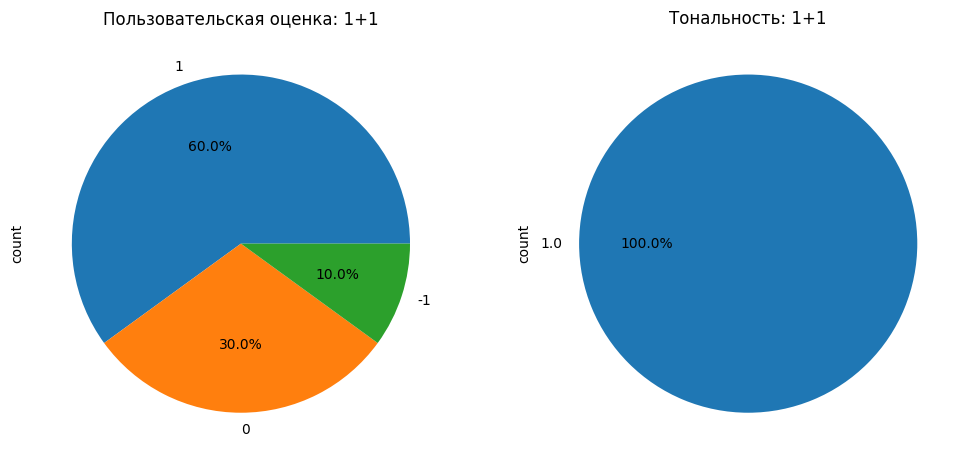

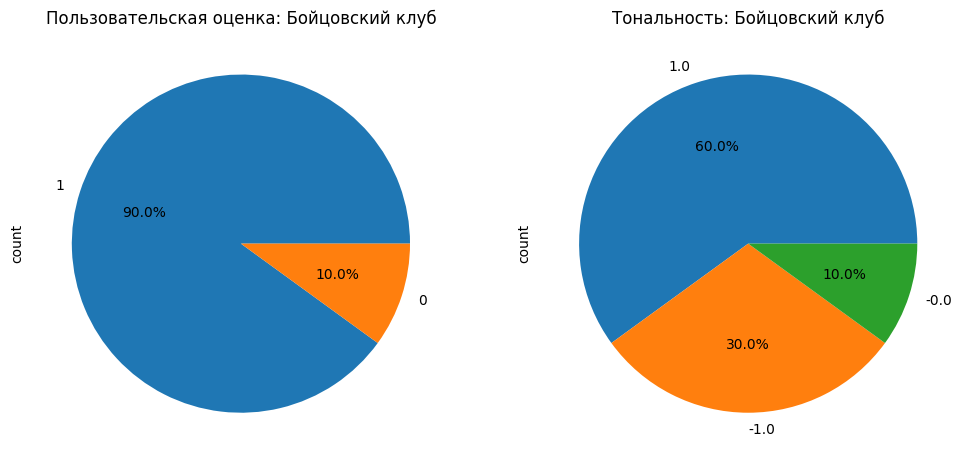

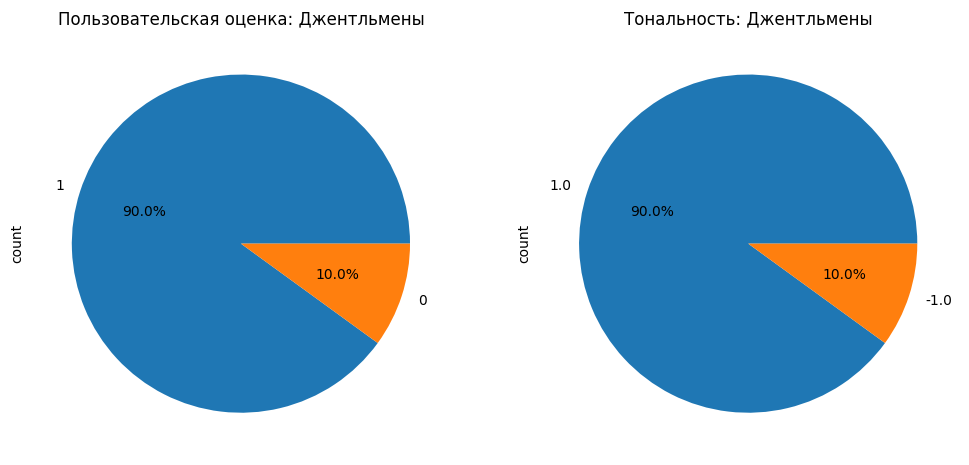

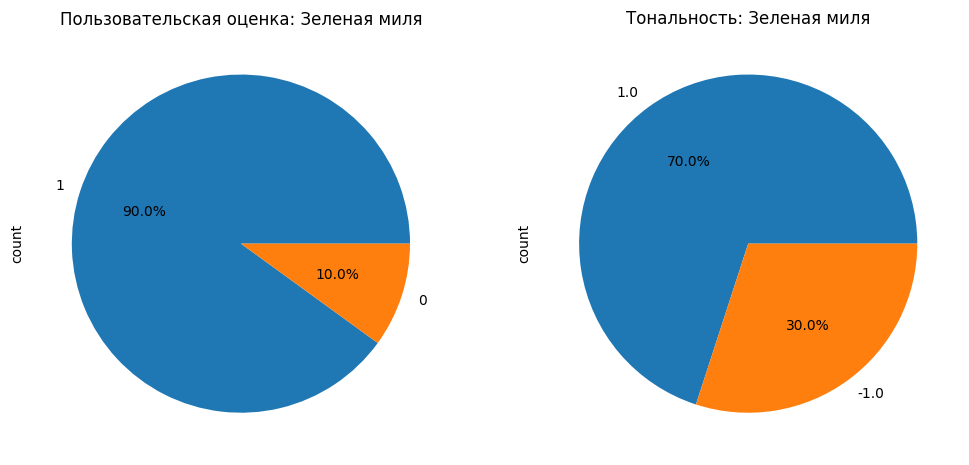

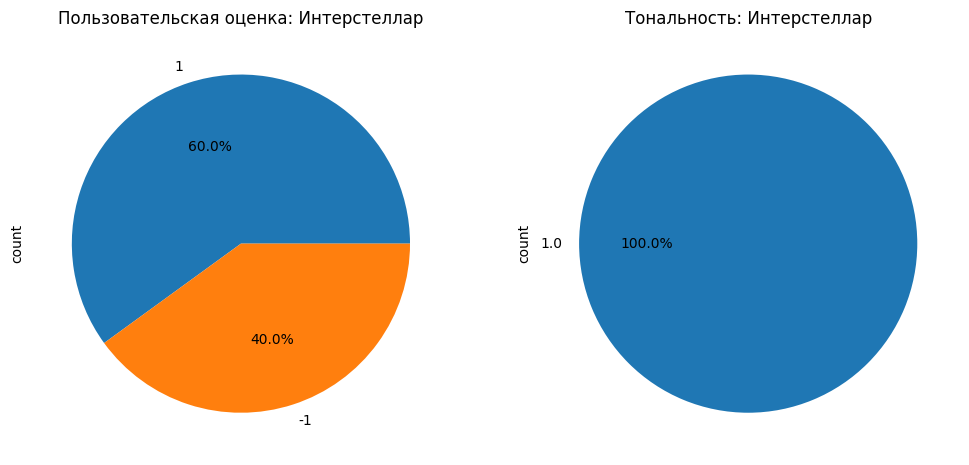

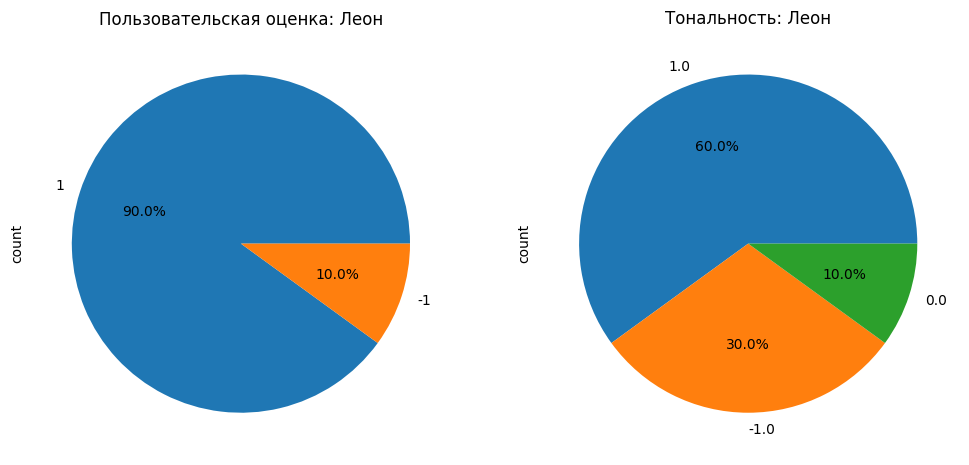

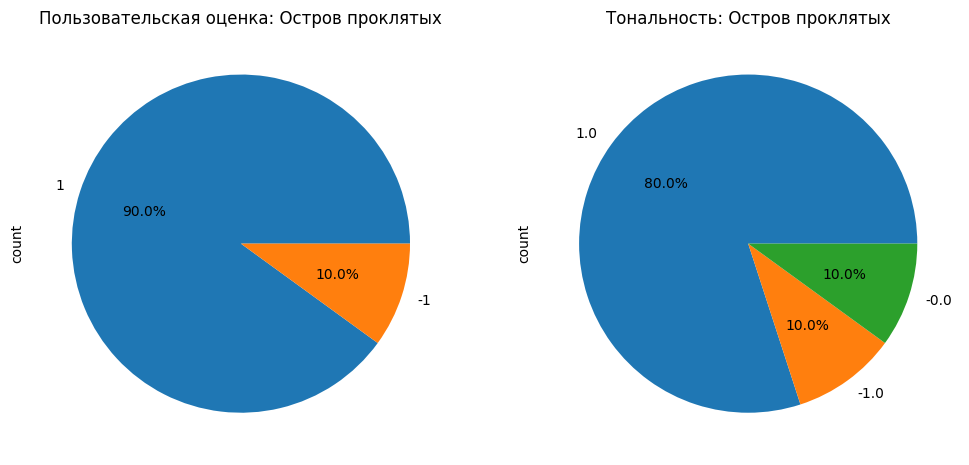

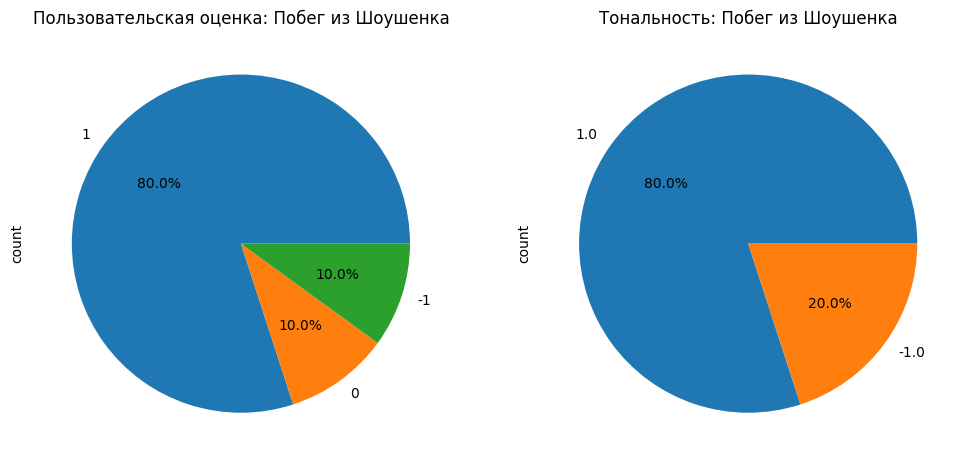

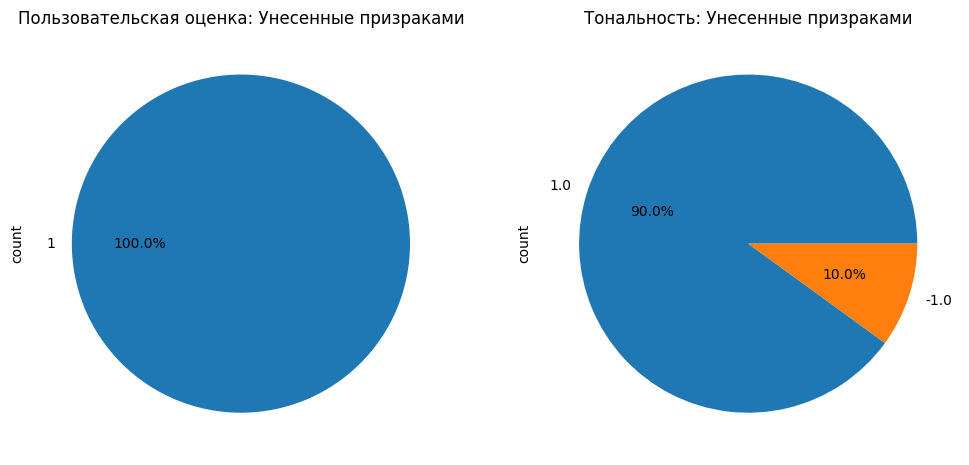

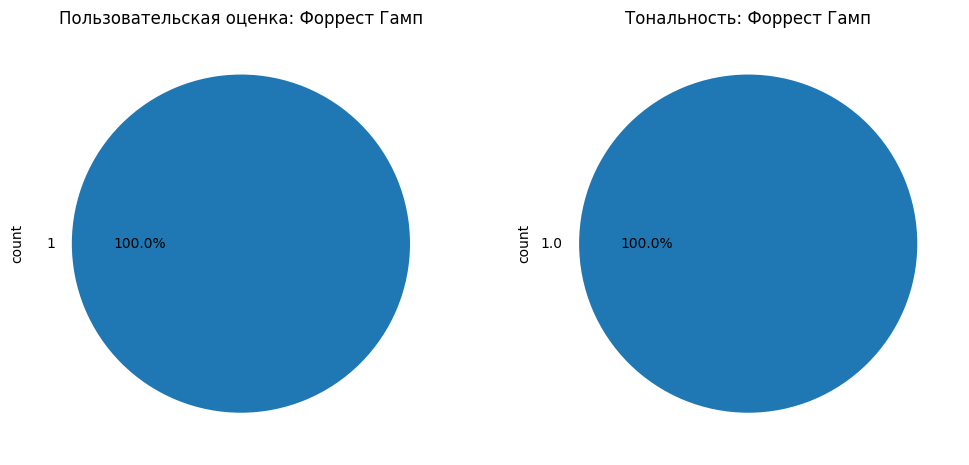

In [399]:
for movie, movie_df in df.groupby('Movie'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    movie_df['Actual_tone'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Пользовательская оценка: {movie}')
    plt.subplot(1, 2, 2)
    movie_df['Sentiment_tone'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Тональность: {movie}')
    plt.show()